# **Project 2** Network Architecture Search and Expert Designed CNNs for Multi-target Concrete Crack Detection

## 1. General Review

In this project, we focus on the problem of bridge crack detection in [CODEBRIM](https://zenodo.org/record/2620293#.YcC-4LhKiNc) dataset for assessing the structural integrity in multi-target scenario. We compare two branches of convolutional neural networks (CNNs): expert-designed complex CNNs (e.g. [VGG](https://pytorch.org/hub/pytorch_vision_vgg/), [ResNet](https://pytorch.org/hub/pytorch_vision_resnet/), [AlexNet](https://pytorch.org/hub/pytorch_vision_alexnet/)) and automatically generated lightweight CNNs from network architecture search ([NAS](https://en.wikipedia.org/wiki/Neural_architecture_search)).




## 2. Model at a quick look

### 2.1 Load model
Run the cell below to get a primary impression of our model. We use **ZenNAS-1** as an example to show a fundamental workflow of our model. We first load model parameters from [local file](./hard_ZenNas_withPretrain.pth). 

In [28]:
from ZenNas_example import *
%load_ext autoreload
%autoreload 2
# model_path = "./hard_ZenNas_withPretrain.pth"
# class_num = 6
# squeeze = False
# model = get_zennet(model_path, class_num, squeeze)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2.2 Load test picture
Then load a random picture from test set and have a glance at what our data is like. The picture has been preprocessed which means it was cropped and resized

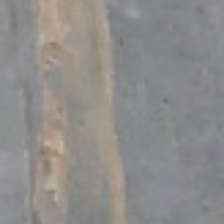

Sort              0/1
--------------  -----
Background          0
Crack               0
Spallation          0
Efflorescence       1
ExposedBars         0
CorrosionStain      0


In [31]:
data, label = get_sample()
show_sample(data)
show_label(label)

### 2.3 Predict
Feed the sample data into our model to get a prediction

In [32]:
import torch
outputs = model(data)
outputs = torch.sigmoid(outputs)
show_label(outputs)

NameError: name 'model' is not defined